In [170]:
#데이터 준비하기 
import pandas as pd
train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

train_max_input = train_data.drop(['id', 'Target'], axis=1)
train_max_target = train_data['Target']
#train_max_input = pd.get_dummies(train_max_input).to_numpy()
ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")
ques_input = ques_data.drop(['id'], axis=1)
#ques_input = pd.get_dummies(ques_input).to_numpy()


In [171]:
print(type(train_max_input))
print(type(train_max_target))
print(type(ques_input))
print(train_max_input.to_numpy())
print(train_max_input.columns)
print(train_max_input['Gender']=='M')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[['M' 0.605 0.47 ... 0.3925 0.291 0.31]
 ['I' 0.43 0.315 ... 0.175 0.08 0.1045]
 ['I' 0.58 0.49 ... 0.5305 0.254 0.41]
 ...
 ['F' 0.525 0.41 ... 0.416 0.163 0.18]
 ['F' 0.445 0.335 ... 0.2025 0.1095 0.1195]
 ['F' 0.75 0.55 ... 0.83 0.366 0.44]]
Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight'],
      dtype='object')
0        True
1       False
2       False
3        True
4       False
        ...  
1248    False
1249    False
1250    False
1251    False
1252    False
Name: Gender, Length: 1253, dtype: bool


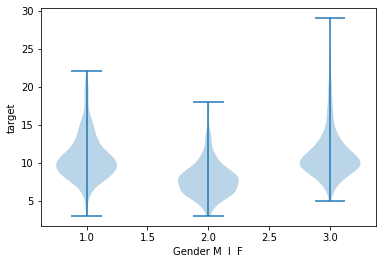

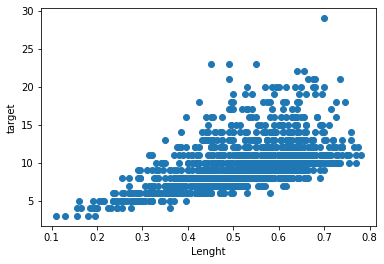

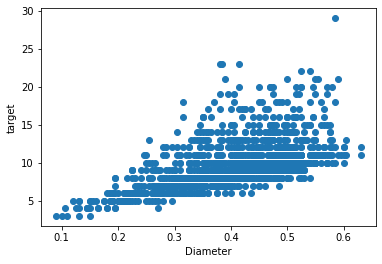

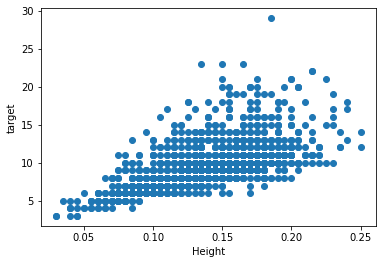

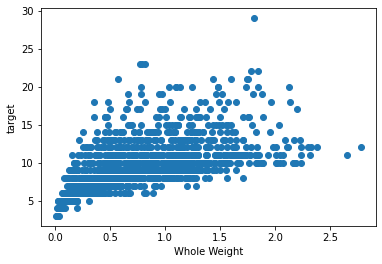

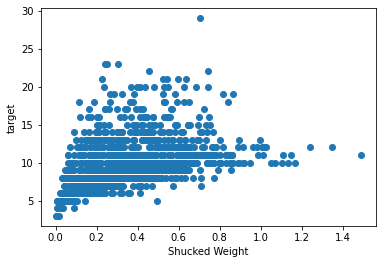

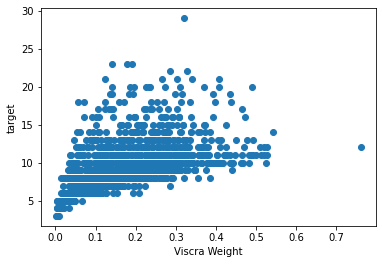

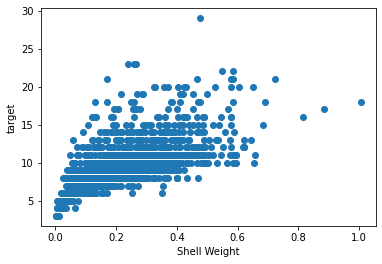

In [172]:
import matplotlib.pyplot as plt
i=1
for column in train_max_input.columns:
    if column == 'Gender':
        plt.violinplot([train_max_target[train_max_input[column]=='M'],train_max_target[train_max_input[column]=='I'],train_max_target[train_max_input[column]=='F']])
        plt.xlabel("Gender M  I  F")
        plt.ylabel('target')
        plt.show()
    else:
        plt.scatter(train_max_input[column],train_max_target)
        plt.xlabel(column)
        plt.ylabel('target')
        plt.show()

30에 가까운 값 제거 하고 15살 이상 오버 샘플링 필요 한거 같음.

827
350
76


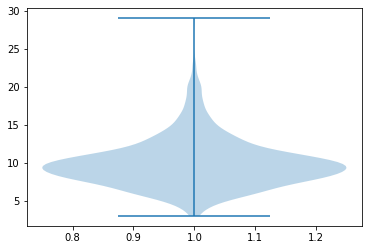

In [173]:
import numpy as np
print(np.sum(train_max_target<=10))
print(np.sum(train_max_target<=15) -np.sum(train_max_target<=10) )
print(np.sum(15<train_max_target))
plt.violinplot(train_max_target)
plt.show()


In [174]:

print(train_max_input.shape)
#train_max_input.drop(index = [train_max_target>25], axis = 0)
train_max_input[train_max_target>25]
train_max_input.drop(index=762,axis =0,inplace= True)
train_max_target.drop(index=762,axis =0,inplace= True)
print(train_max_input.shape)
print(train_max_target.shape)


(1253, 8)
(1252, 8)
(1252,)


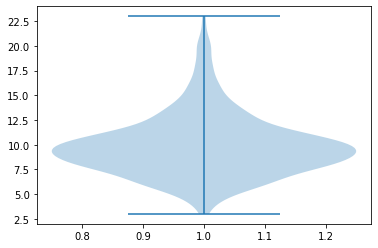

In [175]:
plt.violinplot(train_max_target)
plt.show()


In [176]:
print(np.sum(train_max_target<=5))
print(np.sum(train_max_target<=13) -np.sum(train_max_target<=5) )
print(np.sum(13<train_max_target))

56
1053
143


5보다 작은거랑 13보다 큰거 오버 샘플링 하겠음

In [177]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=13:
        T_range.append(3)
    else:
        T_range.append(4)


In [178]:
T_range =np.array(T_range)
print(T_range)

[4 2 4 ... 2 2 3]


[56, 569, 484, 143]


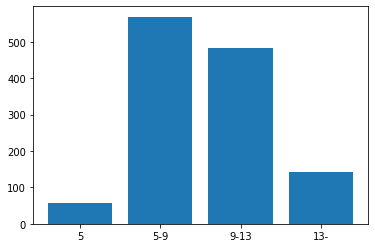

In [179]:

T_range_x = ['5','5-9','9-13','13-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [180]:
print(type(train_max_target))

<class 'pandas.core.series.Series'>


In [181]:
train_T1 =train_max_input[T_range==1]
train_T4 = train_max_input[T_range==4]
train_target_T1 =train_max_target[T_range==1]
train_target_T4 =train_max_target[T_range==4]
for i in range(0,7):
    train_max_input = pd.concat([train_max_input,train_T1],axis=0)
    train_max_target =pd.concat([train_max_target,train_target_T1])
for i in range(0,2):
    train_max_input =pd.concat([train_max_input,train_T4],axis=0)
    train_max_target =pd.concat([train_max_target,train_target_T4])
print(train_max_input.shape)
print(train_max_input)
    
    

(1930, 8)
     Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0         M   0.605     0.470   0.115        1.1140          0.3925   
1         I   0.430     0.315   0.095        0.3780          0.1750   
2         I   0.580     0.490   0.195        1.3165          0.5305   
3         M   0.535     0.405   0.175        1.2705          0.5480   
4         I   0.310     0.235   0.090        0.1270          0.0480   
...     ...     ...       ...     ...           ...             ...   
1224      M   0.585     0.465   0.190        1.1710          0.3905   
1233      M   0.570     0.450   0.155        0.9100          0.3260   
1234      F   0.490     0.385   0.150        0.7865          0.2410   
1237      F   0.515     0.425   0.140        0.7660          0.3040   
1246      M   0.500     0.385   0.145        0.7615          0.2460   

      Viscra Weight  Shell Weight  
0            0.2910        0.3100  
1            0.0800        0.1045  
2            0.2540        0.

[448, 569, 484, 429]


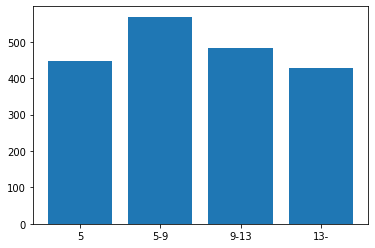

In [182]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=13:
        T_range.append(3)
    else:
        T_range.append(4)

T_range =np.array(T_range)
T_range_x = ['5','5-9','9-13','13-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [183]:
# 원핫 인코딩 후 넘파이 배열로 전환
train_max_input = pd.get_dummies(train_max_input)
ques_input =pd.get_dummies(ques_input)
train_max_input=train_max_input.to_numpy()
train_max_target=train_max_target.to_numpy()
ques_input =ques_input.to_numpy()

In [184]:
#import하기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [185]:
#훈련세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(train_max_input,train_max_target, test_size=0.2, random_state=30)

In [186]:
#훈련세트랑 검증세트도
sub_input, val_input,sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2,random_state=42)

In [187]:
#특성공학으로 특성 늘리기
poly = PolynomialFeatures(degree=2,include_bias= False)
poly.fit(sub_input)
train_poly=poly.transform(train_input)
test_poly = poly.transform(test_input)
sub_poly=poly.transform(sub_input)
val_poly = poly.transform(val_input)
train_max_poly = poly.transform(train_max_input)
ques_poly = poly.transform(ques_input)

In [188]:
#규제 전 전처리 과정
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(sub_poly)
train_scaled = ss.transform(train_poly)
sub_scaled = ss.transform(sub_poly)
val_scaled = ss.transform(val_poly)
train_max_scaled = ss.transform(train_max_poly)
ques_scaled = ss.transform(ques_poly)
test_scaled = ss.transform(test_poly)

In [189]:
#릿지 규제
ridge = Ridge()
ridge.fit(sub_scaled, sub_target)
print(ridge.score(sub_scaled,sub_target))
print(ridge.score(val_scaled,val_target))

0.7355885274686067
0.727729666305075


In [190]:
sub_scores =[]
val_scores = []

In [191]:
#최적의 alpha값 찾기
alpha_list = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for alpha in alpha_list:
    ridge= Ridge(alpha=alpha)
    ridge.fit(sub_scaled, sub_target)
    sub_scores.append(ridge.score(sub_scaled,sub_target))
    val_scores.append(ridge.score(val_scaled,val_target))
    
print(sub_scores)
print(val_scores)
print(np.max(val_scores))
print(np.argmax(val_scores))
alpha_list[np.argmax(val_scores)]

[0.74738987437657, 0.7473807272320587, 0.7469817846252549, 0.743452341025705, 0.7355885274686067, 0.7208423614998896, 0.677002757927868, 0.6245891858226953, 0.4956753188844364]
[0.7430039820990255, 0.7429250055109468, 0.7411776023838343, 0.7335817343348503, 0.727729666305075, 0.7150399353303101, 0.6678386107217302, 0.6222800610844714, 0.4974419773666259]
0.7430039820990255
0


0.0001

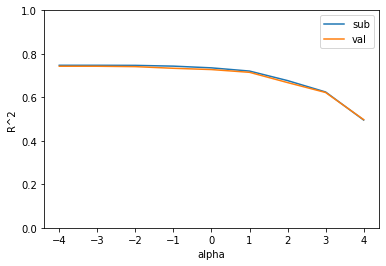

In [192]:
plt.plot(np.log10(alpha_list),sub_scores)
plt.plot(np.log10(alpha_list),val_scores)
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['sub','val'])
plt.show()

In [193]:
#최종 확인
ridge =Ridge(alpha=1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.7359498684283454
0.7545095936449188
